<a href="https://colab.research.google.com/github/emmanuel-mejia/Matematicas-para-Ciencia-de-Datos/blob/main/semana4_Algebra_LSA_Expedientes_m%C3%A9dicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np

from scipy.linalg import sqrtm
from scipy.sparse.linalg import svds  #svd estableciendo k << r

#preprocesar texto
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

nltk.download('stopwords')
nltk.download('wordnet')  #WordNetLemmatizer

#construccion de bolsa de palabras

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

# Funciones

#### elimina_stopwords()

In [18]:
def elimina_stopwords(texto):
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  nuevo_texto = stop.sub('', texto) 
  return nuevo_texto

### elimina_puntuacion()

In [19]:
def elimina_puntuacion(texto):
  nuevo_texto = re.sub('[^A-ZÜÖÄa-z0-9]+', ' ', texto)  #puntuación y todo lo que no sea letra ni números
  nuevo_texto = re.sub(" \d+", " ", nuevo_texto)   # elimina números
  return nuevo_texto


#### lematizar_ingles()

In [20]:
lemmatizer = WordNetLemmatizer()

def lematizar(texto):
  texto=texto.split()
  nuevo_texto = " ".join([lemmatizer.lemmatize(i) for i in texto])
  return nuevo_texto

#### stemmer_inglés()

In [21]:
st = PorterStemmer()

def stemmer(texto):
  texto=texto.split()
  nuevo_texto =" ".join([st.stem(i) for i in texto])
  return nuevo_texto

#### preprocesar(texto)


In [22]:
def preprocesar(texto):
  texto = texto.lower()
  texto = elimina_stopwords(texto)
  texto = elimina_puntuacion(texto)
  texto = stemmer(texto)
  return(texto)

#### vectorizar_consulta ()

In [23]:
def vectorizar_consulta(texto):
  '''regresa la consulta vectorizada con el mismo vocabulario que el corpus, 
  y pesos tfidf en relación al corpus '''
  q = preprocesar(texto)
  q = tfidf.transform([q])
  q = q.toarray()
  return q


#### reducir_vec_consulta()

In [24]:
def reducir_vec_consulta (q):
  q_k = (q @ np.transpose(Vt_k)) @ (D_k)
  return q_k

#### descomposicion_k()

In [25]:
def descomposicion_k(U_k, D_k, Vt_k):
  ''' a partir de las tres matrices corresponeinetes a la  descomposición 
  truncada en  valores singulares (donde k << r),   devuelve dos matrices 
  la primera de tamaño n por k, y la segunda de dimensión k x d  '''
  MDT_n_k = np.matmul(U_k, sqrtm(D_k))
  MDT_k_d = MDT_kd =  np.matmul(sqrtm(D_k), Vt_k)
  return MDT_n_k, MDT_k_d

#### diagnosticos_similares()

In [26]:
def documentos_similares(q_vec, M, lim = 0):
  q_vec = q_vec.flatten()
  n = M.shape[0]
  sim_coseno = {}
  relevantes={}
  # Calcular similitud coseno
  for i in range(n):
    sim_coseno[i] = np.dot(M[i,:], q_vec) / (np.linalg.norm(M[i,:]) * np.linalg.norm(q_vec))
    if sim_coseno[i] > lim:
      relevantes[i] = sim_coseno[i]
  if not relevantes:
    raise Exception( "No existen documentos similares", lim)

  #Ordenar valores
  relevantes_ordenados = {k:v for k, v in sorted(relevantes.items(),
                                                 key=lambda x: x[1],
                                                 reverse=True)}
  indices = list(relevantes_ordenados.keys())
  
  return corpus.loc[indices, :]

#### precision_sensibilidad()

Llega una consulta nueva, tenemos una descripción del caso clínico, lo que hace la precisión es que va a hacer la división de los documentos relevantes encontrados versus los doc encontrados.
La manera de comparar esto es con las etiquetas que tenía cada caso clínico

In [29]:
def precision_sensibilidad(q, M, limites):
  doc_sim_dic = {}
  precision_dic = {}
  sensibilidad_dic = {}
  tolerancias_dic = {}

  for tol in limites:
    tolerancias_dic[tol] = tol
    df_similares = documentos_similares(q, M, lim = tol)
    doc_sim_dic[tol] =df_similares
    Dt = len(df_similares)                       #documentos encontrados 
    Dr = (df_similares['label']==clase_q).sum()  #documentos relevantes encontrados
    Nr = (corpus['label']==clase_q).sum()   #documentos relevantes en todo el corps

    #documentos relevantes encontrados, entre todos los doc encontrados similares
    precision_dic[tol] = Dr / Dt 

    # documentos relevantes encontrados, entre todos los documentos en el corpus
    sensibilidad_dic[tol] = Dr / Nr   #recall

  evaluacion = pd.DataFrame({'precision': precision_dic,
                           'sensibilidad': sensibilidad_dic
                           })
  evaluacion.plot.line(x= 'sensibilidad', y= 'precision', 
                       title ='Precisión vs Sensibilidad',
                       xlim=(0,1), ylim=(0,1))

  plt.grid(alpha=.8, linestyle='--')
  plt.show()
  return evaluacion

# Lectura de datos 

El conjunto completo de datos se encuentra en [OHSUMED dataset](https://www.mat.unical.it/OlexSuite/Datasets/SampleDataSets-about.htm). El dataset que utilizaremos estará un poco preprocesado para quedarnos con resumenes textuales de enfermedades que están catalogadas en 23 categorías.

220422 Relacionar casos solo me intesa saaber cuantas categorias es decir como esstan catalogadaos los ddocumentos, aveces separamos 10 datos en los que conozco su etiqueta al final probamos su predicción

In [28]:
datos = pd.read_csv('https://raw.githubusercontent.com/danieljfeller/medline-multilabel/master/data/processed/ohsumed_abstracts.csv', 
                    usecols=[0,1,2], index_col=0,)
print(datos.shape)
datos.head()

(13924, 2)


,label,doc
0,16,Improved outcome at 28 days of age for very l...
1,5,Chylothorax after posterior spinal instrument...
2,16,Childhood pulmonary function following hyalin...
3,8,Treatment of atelectasis of upper lung lobes....
4,21,"Decision analysis, public health policy, and ..."


In [14]:
len(datos['label'].value_counts())

23

Los documentos están catalogados en 23 categorías

#Separar el corpus para tener documentos de consulta

220422 Separamos un sample

In [16]:
datos.sample(10, random_state=3)

,label,doc
5832,18,Alkaline phosphatase (tissue-nonspecific isoe...
12535,10,The community hospital-based stroke programs ...
151,23,Surgery in patients on long-term steroid ther...
11997,4,Primary Ewing sarcoma: follow-up with Ga-67 s...
13010,21,Psychiatric diagnoses of treatment-seeking co...
3077,21,Clinical experience with the benzodiazepine a...
10659,23,The validity of canine platelet aggregometry ...
965,6,Evaluation of women with possible appendiciti...
8664,14,Heart rate adjustment of exercise-induced ST ...
6687,14,"Auto-PEEP during CPR. An ""occult"" cause of el..."


220422 Establecemos un random state para repetir los elementos

In [17]:
#separamos una muestra aleatoria de 10 documentos, que serán nuestras consultas
consultas_idx = datos.sample(10, random_state=3).index 
consultas = datos.iloc[consultas_idx,:].copy()
consultas

,label,doc
5832,18,Alkaline phosphatase (tissue-nonspecific isoe...
12535,10,The community hospital-based stroke programs ...
151,23,Surgery in patients on long-term steroid ther...
11997,4,Primary Ewing sarcoma: follow-up with Ga-67 s...
13010,21,Psychiatric diagnoses of treatment-seeking co...
3077,21,Clinical experience with the benzodiazepine a...
10659,23,The validity of canine platelet aggregometry ...
965,6,Evaluation of women with possible appendiciti...
8664,14,Heart rate adjustment of exercise-induced ST ...
6687,14,"Auto-PEEP during CPR. An ""occult"" cause of el..."


220422 dropea los duplicados y deshaszte completamente de ellos, ve los duplicados y se deshace del segundo porque quiero sacar estas noticias del cuerpo de noticias

In [31]:
#dejamos el resto de documentos como nuestro corpus
corpus = pd.concat([datos,consultas]).drop_duplicates(keep=False).reset_index(drop=True)
consultas = consultas.reset_index(drop=True)
print(corpus.shape)
corpus.tail()

(13914, 2)


,label,doc
13909,11,Results of blepharoptosis surgery with early ...
13910,11,"A century of cerebral achromatopsia, This rev..."
13911,11,Intraocular lens implantation after penetrati...
13912,11,Reproducibility of topographic measurements o...
13913,11,Cyclocryotherapy in selected cases of congeni...


In [32]:
consultas

,label,doc
0,18,Alkaline phosphatase (tissue-nonspecific isoe...
1,10,The community hospital-based stroke programs ...
2,23,Surgery in patients on long-term steroid ther...
3,4,Primary Ewing sarcoma: follow-up with Ga-67 s...
4,21,Psychiatric diagnoses of treatment-seeking co...
5,21,Clinical experience with the benzodiazepine a...
6,23,The validity of canine platelet aggregometry ...
7,6,Evaluation of women with possible appendiciti...
8,14,Heart rate adjustment of exercise-induced ST ...
9,14,"Auto-PEEP during CPR. An ""occult"" cause of el..."


# Preprocesamiento de texto

In [33]:
ejemplo = np.random.choice(corpus['doc'])
print(len(ejemplo))
ejemplo

1146


' Postoperative follow-up of patients with early breast cancer. Patterns of care among clinical oncologists and a review of the literature, Eighty clinical oncologists in the southeastern United States were surveyed to determine their strategies for follow-up care after primary treatment of early-stage breast cancer. The frequency of use of the history and physical examination. complete blood count. liver function tests. carcinoembryonic antigen levels. chest x-ray. skeletal survey. bone scan. liver scan. and mammogram for observing hypothetical low- and high-risk patients was assessed. Yearly mammograms were recommended by more than 95% of respondents. History and physical examination were the modalities used most often. whereas periodic bone and liver scans were used only in a minority of patients. A review of the literature supported the strategy of the respondents in this survey and further underscored the cost-effectiveness of the history and physical examination in detecting recu

#### Transformar texto a minúsculas

220422 Puede tener problemas con mayusculas y minusculas y trabajaamos con ello

In [34]:
ejemplo = ejemplo.lower()
print(len(ejemplo))
ejemplo

1146


' postoperative follow-up of patients with early breast cancer. patterns of care among clinical oncologists and a review of the literature, eighty clinical oncologists in the southeastern united states were surveyed to determine their strategies for follow-up care after primary treatment of early-stage breast cancer. the frequency of use of the history and physical examination. complete blood count. liver function tests. carcinoembryonic antigen levels. chest x-ray. skeletal survey. bone scan. liver scan. and mammogram for observing hypothetical low- and high-risk patients was assessed. yearly mammograms were recommended by more than 95% of respondents. history and physical examination were the modalities used most often. whereas periodic bone and liver scans were used only in a minority of patients. a review of the literature supported the strategy of the respondents in this survey and further underscored the cost-effectiveness of the history and physical examination in detecting recu

#### Quitar puntuación

220422 Quitar los signos de puntuación ..

In [35]:
ejemplo = elimina_puntuacion(ejemplo)
print(len(ejemplo))
ejemplo

1125


' postoperative follow up of patients with early breast cancer patterns of care among clinical oncologists and a review of the literature eighty clinical oncologists in the southeastern united states were surveyed to determine their strategies for follow up care after primary treatment of early stage breast cancer the frequency of use of the history and physical examination complete blood count liver function tests carcinoembryonic antigen levels chest x ray skeletal survey bone scan liver scan and mammogram for observing hypothetical low and high risk patients was assessed yearly mammograms were recommended by more than  of respondents history and physical examination were the modalities used most often whereas periodic bone and liver scans were used only in a minority of patients a review of the literature supported the strategy of the respondents in this survey and further underscored the cost effectiveness of the history and physical examination in detecting recurrence during follo

#### Quitar Palabras Irrelevantes ("Stopwords")

220422 son palabras irrelevantes, meten mucho ruiddo no son muy útiles, se va a adeshacer de todas estas stopware, primero quita palabras como the, on, at, and ...

In [36]:
ejemplo = elimina_stopwords(ejemplo)
print(len(ejemplo))
ejemplo

874


' postoperative follow patients early breast cancer patterns care among clinical oncologists review literature eighty clinical oncologists southeastern united states surveyed determine strategies follow care primary treatment early stage breast cancer frequency use history physical examination complete blood count liver function tests carcinoembryonic antigen levels chest x ray skeletal survey bone scan liver scan mammogram observing hypothetical low high risk patients assessed yearly mammograms recommended respondents history physical examination modalities used often whereas periodic bone liver scans used minority patients review literature supported strategy respondents survey underscored cost effectiveness history physical examination detecting recurrence follow based survey supporting literature recommendations reasonable yet cost conscious follow presented '

## Normalización
Existen dos principales técnicas para normalizar el texto, la lematización y "radicalización" o stemming, que consiste en la  conversión de palabras en las raices

Referencia: 

https://towardsdatascience.com/introduction-to-nlp-part-2-difference-between-lemmatisation-and-stemming-3789be1c55bc

220422 En este ejemplo podemos quitar stopwords

220422 la lematización deja las palabras parecidas, las cortan las considera iguales y el stemmer corta las palabras y las considera diferentes

In [40]:
# Ejemplo de diferencia entre lematización y stemización (radicalización)
oracion = 'i have one foot and two feet constitutional'
print(lematizar(oracion))
print(stemmer(oracion))

i have one foot and two foot constitutional
i have one foot and two feet constitut


In [38]:
ejemplo_lema = lematizar(ejemplo)
print(len(ejemplo_lema))
ejemplo_lema

854


'postoperative follow patient early breast cancer pattern care among clinical oncologist review literature eighty clinical oncologist southeastern united state surveyed determine strategy follow care primary treatment early stage breast cancer frequency use history physical examination complete blood count liver function test carcinoembryonic antigen level chest x ray skeletal survey bone scan liver scan mammogram observing hypothetical low high risk patient assessed yearly mammogram recommended respondent history physical examination modality used often whereas periodic bone liver scan used minority patient review literature supported strategy respondent survey underscored cost effectiveness history physical examination detecting recurrence follow based survey supporting literature recommendation reasonable yet cost conscious follow presented'

In [41]:
ejemplo_stem = stemmer(ejemplo)
print(len(ejemplo_stem))
ejemplo_stem

746


'postop follow patient earli breast cancer pattern care among clinic oncologist review literatur eighti clinic oncologist southeastern unit state survey determin strategi follow care primari treatment earli stage breast cancer frequenc use histori physic examin complet blood count liver function test carcinoembryon antigen level chest x ray skelet survey bone scan liver scan mammogram observ hypothet low high risk patient assess yearli mammogram recommend respond histori physic examin modal use often wherea period bone liver scan use minor patient review literatur support strategi respond survey underscor cost effect histori physic examin detect recurr follow base survey support literatur recommend reason yet cost consciou follow present'

## Todo junto

220422 Es un mapeo en pandas, utiliza la función preprocesar paara mapear en todos los documentos y deja un dataframe o columna que deja un...

In [42]:
%%time
corpus['doc_pp'] = corpus['doc'].apply(preprocesar)

CPU times: user 46.9 s, sys: 351 ms, total: 47.2 s
Wall time: 49.6 s


In [43]:
corpus.head()

,label,doc,doc_pp
0,16,Improved outcome at 28 days of age for very l...,improv outcom day age low birth weight infant ...
1,5,Chylothorax after posterior spinal instrument...,chylothorax posterior spinal instrument fusion...
2,16,Childhood pulmonary function following hyalin...,childhood pulmonari function follow hyalin mem...
3,8,Treatment of atelectasis of upper lung lobes....,treatment atelectasi upper lung lobe select br...
4,21,"Decision analysis, public health policy, and ...",decis analysi public health polici isoniazid c...


# Bolsa de palabras peso TF-IDF

Usaremos la funcion **```TFidfVectorize```** de skleran
Notar que el paramentro **```min_df```** hace la función "cut-off" para no considerar los términos con poca frecuencia en el documento.
En este ejercio se ha establecido una frecuencia de al menos 70 documentos que contengan el término que corresponde a cerca del 0.5% de todos los documentos


220422 El logaritmo de las ocurrencias entre las frecuencias del texto.
La ocurrencia del texto entre el total de la longitud del texto, 
La suma de las que han apereceddo 70 veces despues apalicao el tfidf a los que ya estan sistematizaados, es decir voy a tener todas las palaabras con las que voy a vectorizar mis textos, 13914 *2049 
Lo que dice la matriz es que no tiene la paalabra aaabil, aabl... pero tiene la palabra would, year, yet, yield, etc...
Se usa asi porque tiene n palabras ...



In [44]:
tfidf = TfidfVectorizer(min_df=70)
mdt_tfidf = tfidf.fit_transform(corpus['doc_pp']) 
palabras = tfidf.get_feature_names()
MDT = pd.DataFrame(mdt_tfidf.todense(), 
                              index=corpus.index, 
                              columns=palabras)
print(MDT.shape)
MDT

(13914, 2049)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdomin,abil,abl,abnorm,abscess,absenc,absent,absolut,absorpt,abstract,...,would,wound,year,yet,yield,york,young,younger,yr,zone
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.058752,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.071739,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.153212,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.045617,0.0,0.0,0.0,0.087732,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13910,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13911,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.097259,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13912,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [45]:
#¿qué porcentaje de celdas tienen cero?

no_ceros = MDT.astype(bool).sum().sum()  #cantidad de ceros en todo el dataframe
total = MDT.shape[0] * MDT.shape[1]

(1- no_ceros/total) * 100

97.33475726545264

# Descomposición en valores singulares (SVD) con numpy

$~~ M = U~D~V^{T}$

$~~ M = 
\sum_{i=1}^{min(m, n)}s_{i}\cdot u_{1}v_{i}^{T}
$






In [46]:
# Ver las dimensiones de las tres matrices
# Descomposición Matriz Documento Término  (3 min)
U_, sigma_, Vt_ = np.linalg.svd(MDT)

# obtener con los valores seingulare (sigma) la matriz D
D_ = np.diag(sigma_)

print(U_.shape, D_.shape, Vt_.shape)

(13914, 13914) (2049, 2049) (2049, 2049)


220422 vamos a ver cuantos valores son cero, significa que los valores van a poder ser invertibles es decir podemos hacer una inversa de esa matriz.
una vez que tenemos la matriz descompuesta, si recuerdan esta matriz representa oraciones vs caracteristicas y vemos que los 2049 son distintos de cero 

In [47]:
sigma_.shape

(2049,)

In [48]:
#¿cuántos valores de sigma son distintos de cero?
sigmas = sigma_[np.nonzero(sigma_)]
len(sigmas)

2049

**Esto quiere decir que la matriz inicial no es singular**

In [49]:
# En el vector sigma estan ordenados los eigenvalores
sigma_

array([22.71384495, 12.01617847, 11.00848057, ...,  0.58259066,
        0.44313759,  0.38249107])

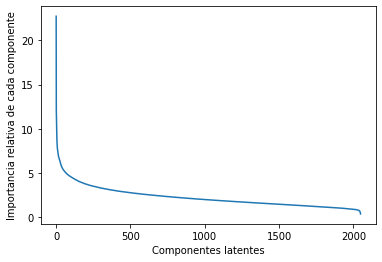

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

k = 2049
sns.lineplot(x=list(range(len(sigma_[0:k]))), y = sigma_[0:k])
plt.ylabel('Importancia relativa de cada componente')
plt.xlabel('Componentes latentes')
plt.show()

# Análisis Semántico Latente
 SVD especificando $k<r$ con scipy


$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\hat{M} = U_{k}~~D_{k}~~V_{k}^{T}
$

In [51]:
%%time
#from scipy.sparse.linalg import svds
U_k, sigmas_k, Vt_k = svds(MDT, k=100)
D_k = np.diag(sigmas_k)

CPU times: user 22.9 s, sys: 14.3 s, total: 37.2 s
Wall time: 19 s


220422 Obtenemos el vector reducido para facilitar operaciones, para depender de menos eigen values y para evitar tener la matriz dispersa y nos conviene factorizar de manera distinta 

In [52]:
#docs-temas / relevancia temas / temas-doc

U_k.shape, D_k.shape, Vt_k.shape

((13914, 100), (100, 100), (100, 2049))


### Obtener la matriz reducida de latent semantic análisis que representa a cada documento con k términos

$ M_{n\times{k}} = U_{k}~~\sqrt{D_{k}} $

In [53]:
M1 = np.matmul(U_k, sqrtm(D_k)) 
M1.shape

(13914, 100)

### Obtener la matriz reducida de latent que representa a cada palabra con k términos
$ M_{k\times{d}} = \sqrt{D_{k}}~~{V_{k}}^T~~ $

In [54]:
M2 =  np.matmul(sqrtm(D_k), Vt_k) 
M2.shape

(100, 2049)

por facilidad la función **```descomposicion_k()```** regresa las dos matrices obtenidas en las líneas anteriores



In [55]:
MDT_nk, MDT_kd = descomposicion_k(U_k, D_k, Vt_k )

print(MDT_nk.shape, MDT_kd.shape)

(13914, 100) (100, 2049)


In [56]:
#renglones reducidos y columnas reducidas
(M1).shape, np.transpose(M2).shape


((13914, 100), (2049, 100))

## Vectorizar consulta (texto nuevo)


**debemos vectorizar nuestra consulta utilizando el mismo vocabulario que el corpus**

In [57]:
#podemos usar cualquier texto
q = vectorizar_consulta('heart desease')
q.shape

(1, 2049)

In [58]:
q

array([[0., 0., 0., ..., 0., 0., 0.]])

como vemos, tenemos ahora la consulta con las d dimensiones que corresponden al vocabulario del corpus.



**ahora es necesario reducir el vector, usando nuestras matrices**

$\hat{q} = 
q~V_{k}~D
$

si la matriz no fuera dispersa hay ligeros problemas para hacer esta matriz 

In [59]:
q_k = (q @ np.transpose(Vt_k)) @ (D_k)
print(q.shape, np.transpose(Vt_k).shape, D_k.shape )
print(q_k.shape)

(1, 2049) (2049, 100) (100, 100)
(1, 100)


por facilidad guardamos el código anterior en la función **```reducir_vec_consulta()```**



In [60]:
q_k = reducir_vec_consulta(q)
q_k.shape

(1, 100)

In [61]:
 # elegir aleatoriamente uno de los diagnósticos como consulta
 # guardamos la clase y el texto
q_idx = 1
clase_q =consultas.iloc[q_idx,0]   
Q = consultas.iloc[q_idx,1]

print('Clase de la consulta:' , clase_q,'\n')
Q

Clase de la consulta: 10 



' The community hospital-based stroke programs in North Carolina, Oregon and New York--V. Stroke diagnosis: factors influencing the diagnostic evaluation of patients following acute stroke, Among the 4129 patients of the Community Hospital-based Stroke Program. 30% had an unspecified stroke diagnosis. Since specific diagnosis and. perhaps. eventual treatment. derives in part from diagnostic testing. we examined the effect of clinical condition. geographic and demographic factors on the incidence of certain diagnostic tests after acute stroke. In this multivariable analysis. race. sex. history of hypertension and history of diabetes did not influence the chance of having any test. but older age strongly reduced the chances of receiving extensive evaluation. When CT scanning was available. the utilization of a CT as well as other diagnostic studies including cerebral angiography. radionuclide brain scan. EEG and EKG was increased. The odds of receiving a CT scan increased if the patient 

220422 vecorizamos

In [62]:
q = vectorizar_consulta(Q)  # preprocesamos y vectorizamos 
q_k = reducir_vec_consulta(q)  # reducimos a k dimensiones 
print ('Dimensión vector q  :', q.shape) 
print ('Dimensión vector q_k:', q_k.shape)

Dimensión vector q  : (1, 2049)
Dimensión vector q_k: (1, 100)


## Obtener documentos relevantes a la consulta

220422 Todos los textos vectorizados los comparamos con cada uno de los otros vectores con similitud coseno y los que son mayor a .4 son las buenas o similares, depende del modelo que usemos podemos cambiar el .4 a .8 y ver que tanto mejoran las precisiones, le pasamos el vector con el que queremos comparar y un límite, al pasar sobre todo los datos recupera 153 de los cuales 62 son de la misma clase a lo que encontré similitudes, mientras que en el corpus hay 1221 es decir estan pasando muchos, la sensibilidad y recall es muy bajo, el valor era cero, cuando son iguales.
Puede que los casos clínicos tienen una descripción diferente pero que son parecidos ...

In [63]:
tol = .4  # valor a partir del que se considera un doc similar a la consulta, el limite o threshold

doc_sim = documentos_similares(q_k, MDT_nk, lim = tol)


Dt = len(doc_sim)                       #documentos encontrados 
Dr = (doc_sim['label']==clase_q).sum()  #documentos relevantes encontrados
Nr = (corpus['label']==clase_q).sum()   #documentos relevantes en todo el corps

#documentos relevantes encontrados, entre todos los doc encontrados similares
precision = Dr / Dt 

#documentos relevantes encontrados, entre todos los doc relevantes en el corpus
sensibilidad = Dr / Nr   #recall

print ('                 Documentos encontrados: ', Dt)
print ('      Documentos relevantes encontrados: ', Dr)
print ('Documentos relevantes en todo el corpus: ', Nr, '\n')

print ('                              Precisión: {:1.2f}'.format(precision))
print ('                           Sensibilidad: {:1.2f}'.format(sensibilidad))

                 Documentos encontrados:  153
      Documentos relevantes encontrados:  62
Documentos relevantes en todo el corpus:  1221 

                              Precisión: 0.41
                           Sensibilidad: 0.05


In [64]:
tol = .2  # valor a partir del que se considera un doc similar a la consulta

doc_sim = documentos_similares(q, MDT.to_numpy(), lim = tol)


Dt = len(doc_sim)                       #documentos encontrados 
Dr = (doc_sim['label']==clase_q).sum()  #documentos relevantes encontrados
Nr = (corpus['label']==clase_q).sum()   #documentos relevantes en todo el corps

#documentos relevantes encontrados, entre todos los doc encontrados similares
precision = Dr / Dt 

# documentos relevantes encontrados, entre todos los docrelevantes en el corpus
sensibilidad = Dr / Nr   #recall

print ('                 Documentos encontrados: ', Dt)
print ('      Documentos relevantes encontrados: ', Dr)
print ('Documentos relevantes en todo el corpus: ', Nr, '\n')

print ('                              Precisión: {:1.2f}'.format(precision))
print ('                           Sensibilidad: {:1.2f}'.format(sensibilidad))

                 Documentos encontrados:  62
      Documentos relevantes encontrados:  43
Documentos relevantes en todo el corpus:  1221 

                              Precisión: 0.69
                           Sensibilidad: 0.04


## Evaluación de la recuperación de información

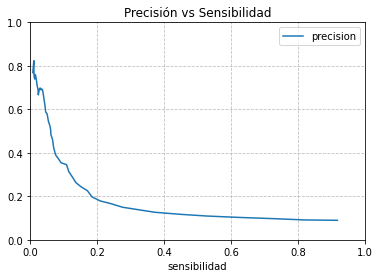

In [65]:
tols = np.linspace(0.01, 0.3,50)
evaluacion = precision_sensibilidad(q, MDT.to_numpy(),tols)

220422 vamos a tomar 50.01 y vemos la precisión vs la sensibilidad, la primera vectorización...
En la segundo temnemos 

In [ ]:
tols = np.linspace(0.15, 0.5, 50)
evaluacion_k = precision_sensibilidad(q_k, MDT_nk, tols)

In [66]:
eval = pd.merge(evaluacion_k, evaluacion, how='left', on= evaluacion.index, suffixes  = ('_k',''))
eval.head()

NameError: ignored

220422 La precisión y la sensibilidad se parecen bastante parecidas y podriamos hacer ciertos calculos en los que que hay 

La fact con 100 fueron 20 seg, mientras que la completa fueron x mas minutos, este tipo de cosas servirian bastante porque podemos



In [67]:
figsize =(4,4)
plt.plot(eval['sensibilidad_k'], eval['precision_k'], label='vec_k')
plt.plot(eval['sensibilidad'],  eval['precision'], label='vec_d')

plt.xlim=(.15,1)

plt.legend()
plt.grid(alpha=.8, linestyle='--')
plt.show()

TypeError: ignored